In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers , models
sns.set_style('whitegrid')

In [2]:
(train_images , train_labels), (test_images , test_labels)=datasets.cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

In [5]:
train_images[0].shape

(32, 32, 3)

In [6]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

<function matplotlib.pyplot.show(close=None, block=None)>

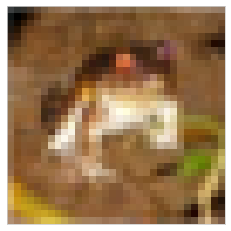

In [7]:
plt.imshow(train_images[0])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show

In [8]:
train_labels[0]

array([6], dtype=uint8)

In [9]:
train_labels[0][0]

6

<function matplotlib.pyplot.show(close=None, block=None)>

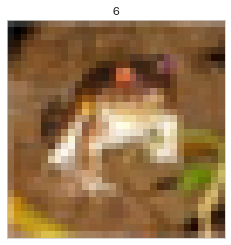

In [10]:
plt.imshow(train_images[0])
plt.title(train_labels[0][0])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show

In [11]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
class_names[0]

'airplane'

In [13]:
class_names[6]

'frog'

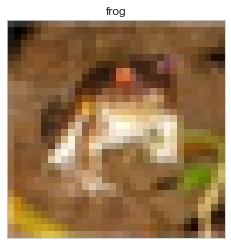

In [14]:
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0][0]])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

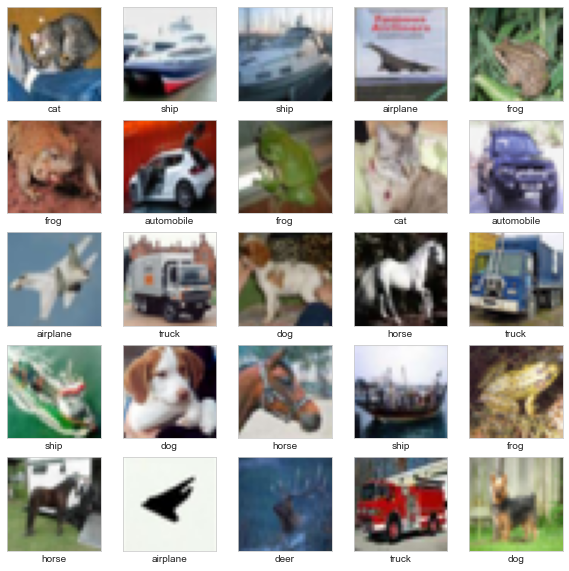

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

In [16]:
train_images,test_images = train_images / 255.0, test_images / 255.0

In [17]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [20]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [21]:
model.compile(optimizer='adam',
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [22]:
history = model.fit(train_images,train_labels,epochs=40,
                   validation_data=(test_images,test_labels))

Epoch 1/40
1563/1563 [==============================] - 64s 40ms/step - loss: 1.7742 - accuracy: 0.3104 - val_loss: 1.4916 - val_accuracy: 0.4183
Epoch 2/40
1563/1563 [==============================] - 63s 40ms/step - loss: 1.3922 - accuracy: 0.4724 - val_loss: 1.2983 - val_accuracy: 0.5204
Epoch 3/40
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1857 - accuracy: 0.5706 - val_loss: 1.1377 - val_accuracy: 0.5945
Epoch 4/40
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0548 - accuracy: 0.6235 - val_loss: 1.0675 - val_accuracy: 0.6133
Epoch 5/40
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9660 - accuracy: 0.6563 - val_loss: 1.0117 - val_accuracy: 0.6441
Epoch 6/40
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8918 - accuracy: 0.6844 - val_loss: 1.0139 - val_accuracy: 0.6471
Epoch 7/40
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8303 - accuracy: 0.7070 - val_loss: 1.0496 -

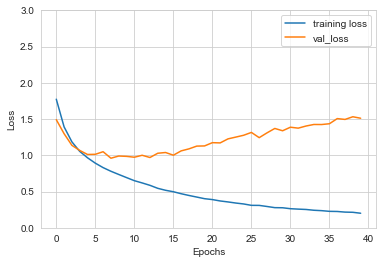

In [23]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 3])

plt.legend(loc=0)
plt.show()

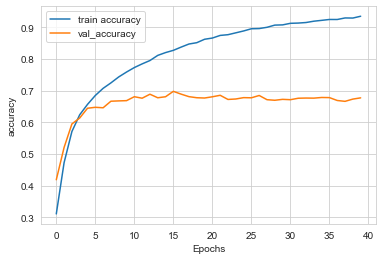

In [24]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
#plt.ylim([0, 2])

plt.legend(loc=0)
plt.show()

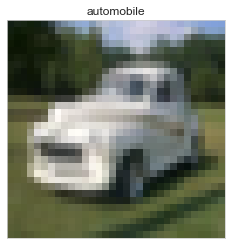

In [25]:
plt.imshow(test_images[1005])
plt.title(class_names[test_labels[1005][0]])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [26]:
model.predict(test_images[1005].reshape(1,32,32,3))

array([[3.23563727e-04, 9.95754957e-01, 5.08705052e-05, 1.73597800e-06,
        1.07527834e-04, 1.50703054e-04, 1.69369552e-04, 9.40403697e-05,
        1.71028147e-03, 1.63696089e-03]], dtype=float32)

In [27]:
model.predict(test_images[1005].reshape(1,32,32,3)).round(3)

array([[0.   , 0.996, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002,
        0.002]], dtype=float32)

In [28]:
np.argmax(model.predict(test_images[1005].reshape(1,32,32,3)))

1

In [29]:
class_names[np.argmax(model.predict(test_images[1005].reshape(1,32,32,3)))]

'automobile'

In [ ]:
# 10 classes 
# this data is already splited,tested,trained
# RGB images ie. 3 channels images
# images dimension is (32,32,3)(h,w,c)
# dataset consist of 60000 images in (32,32) color images in 10 classes 60000 images
# per classes 50000 for training and 10000 for testing images
# 32*32=1024 3 channels(R+G+B)=(1024+1024+1024=3072 input variables)
# ek image flatten hone k bad 3072 etne